<a href="https://colab.research.google.com/github/ToHLz/Machine-learning/blob/main/DL_challenge_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder as le
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense

from sklearn import metrics

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ToHLz/Machine-learning/main/train.csv')

# summarise the details
print(f'Number of entries: {len(df)}')
df.head()

Number of entries: 668


,Id,A1,A2,A3,A4,A5,A6,A7,A8,Class
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      668 non-null    int64  
 1   A1      668 non-null    int64  
 2   A2      668 non-null    int64  
 3   A3      668 non-null    int64  
 4   A4      668 non-null    int64  
 5   A5      668 non-null    int64  
 6   A6      668 non-null    float64
 7   A7      668 non-null    float64
 8   A8      668 non-null    int64  
 9   Class   668 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 52.3 KB


In [ ]:
df.describe()

,Id,A1,A2,A3,A4,A5,A6,A7,A8,Class
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,334.500000,3.812874,120.405689,68.748503,20.567365,79.654192,31.860180,0.477329,33.091317,0.345808
std,192.979273,3.365672,32.291473,19.526392,16.020600,115.827750,7.827111,0.341398,11.711386,0.475988
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,167.750000,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.238750,24.000000,0.000000
50%,334.500000,3.000000,116.000000,72.000000,23.000000,36.500000,32.000000,0.377000,29.000000,0.000000
75%,501.250000,6.000000,140.000000,80.000000,32.000000,126.000000,36.500000,0.641250,40.000000,1.000000
max,668.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


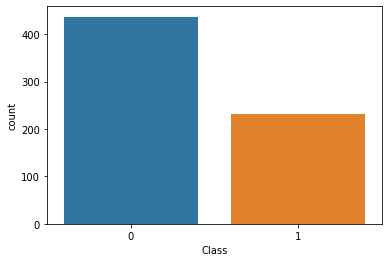

In [ ]:
# Summarise class details
sns.countplot(x=df['Class'])

EXTRACTING LABELS

In [ ]:
# extract labels
y = df['Class']
y = pd.Series(y)
print(y.value_counts())

# remove unnecessary columns
X = df.drop(['Id', 'Class'], axis=1)
print(X.info())
X.head()

0    437
1    231
Name: Class, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      668 non-null    int64  
 1   A2      668 non-null    int64  
 2   A3      668 non-null    int64  
 3   A4      668 non-null    int64  
 4   A5      668 non-null    int64  
 5   A6      668 non-null    float64
 6   A7      668 non-null    float64
 7   A8      668 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 41.9 KB
None


,A1,A2,A3,A4,A5,A6,A7,A8
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


**M1** 

As the initial model, let's think about a simple model using 4 features and 2 hidden layers.

In [ ]:
# Let's select 4 features for this model
X1 = X.iloc[:, 0:4]
X1.head()

,A1,A2,A3,A4
0,6,148,72,35
1,1,85,66,29
2,8,183,64,0
3,1,89,66,23
4,0,137,40,35


SPLIT DATA

In [ ]:
# split data to train and validation sets
X_train1, X_val1, y_train1, y_val1 = train_test_split(X1, y, test_size=0.3, random_state=100)
print(f'training data set size: {len(X_train1)}')
print(f'validation data set size: {len(X_val1)}')

training data set size: 467
validation data set size: 201


BUILD MODEL

In [ ]:
# define the keras model
model1 = Sequential()
model1.add(Dense(12, input_dim=4, activation='relu'))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

model1.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 12)                60        
                                                                 
 dense_34 (Dense)            (None, 8)                 104       
                                                                 
 dense_35 (Dense)            (None, 1)                 9         
                                                                 
Total params: 173
Trainable params: 173
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile the keras model
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# train model
model1.fit(X_train1, y_train1, batch_size=50, epochs=60, validation_data=(X_val1, y_val1))

Epoch 1/60
10/10 [==============================] - 1s 22ms/step - loss: 14.4922 - accuracy: 0.3469 - val_loss: 11.6865 - val_accuracy: 0.3433
Epoch 2/60
10/10 [==============================] - 0s 6ms/step - loss: 9.8859 - accuracy: 0.3512 - val_loss: 7.3011 - val_accuracy: 0.3930
Epoch 3/60
10/10 [==============================] - 0s 4ms/step - loss: 5.8559 - accuracy: 0.4304 - val_loss: 4.2278 - val_accuracy: 0.4527
Epoch 4/60
10/10 [==============================] - 0s 6ms/step - loss: 3.5984 - accuracy: 0.5054 - val_loss: 2.8200 - val_accuracy: 0.5572
Epoch 5/60
10/10 [==============================] - 0s 6ms/step - loss: 2.9078 - accuracy: 0.5717 - val_loss: 2.5796 - val_accuracy: 0.6070
Epoch 6/60
10/10 [==============================] - 0s 6ms/step - loss: 2.6717 - accuracy: 0.6039 - val_loss: 2.1758 - val_accuracy: 0.6269
Epoch 7/60
10/10 [==============================] - 0s 6ms/step - loss: 2.2815 - accuracy: 0.6017 - val_loss: 1.8102 - val_accuracy: 0.6070
Epoch 8/60
10/10 

VALIDATE THE MODEL

In [ ]:
# get model predictions
y_pred1 = model1.predict(X_val1)
print(y_pred1[:10])

[[0.4630322 ]
 [0.2061714 ]
 [0.25987282]
 [0.23994276]
 [0.2997204 ]
 [0.00162017]
 [0.4403739 ]
 [0.1022222 ]
 [0.46439242]
 [0.07195702]]


In [ ]:
# convert to categorical predictions
y_pred_categorical1 = [1 if pred > 0.5 else 0 for pred in y_pred1]
print(y_pred_categorical1[:10])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
# measure accuracy
accuracy = metrics.accuracy_score(y_val1, y_pred_categorical1)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7014925373134329


Test Predictions

In [ ]:
df_test = pd.read_csv('https://raw.githubusercontent.com/ToHLz/Machine-learning/main/test.csv')

# summarise the details
print(f'Number of entries: {len(df_test)}')

X_test = df_test.drop(['Id'], axis=1)
print(X_test.info())

Number of entries: 100
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      100 non-null    int64  
 1   A2      100 non-null    int64  
 2   A3      100 non-null    int64  
 3   A4      100 non-null    int64  
 4   A5      100 non-null    int64  
 5   A6      100 non-null    float64
 6   A7      100 non-null    float64
 7   A8      100 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 6.4 KB
None


In [ ]:
X_test1 = X_test.iloc[:, 0:4]
X_test1.head()

,A1,A2,A3,A4
0,6,98,58,33
1,9,154,78,30
2,6,165,68,26
3,1,99,58,10
4,10,68,106,23


In [ ]:
test_pred = model1.predict(X_test1)
print(test_pred)

test_pred_categorical = [1 if pred > 0.5 else 0 for pred in test_pred]
print(test_pred_categorical)

test_pred_encoded = test_pred_categorical
print(test_pred_encoded)

[[0.36857164]
 [0.42172632]
 [0.54461724]
 [0.27978164]
 [0.00265425]
 [0.3040704 ]
 [0.128743  ]
 [0.7182771 ]
 [0.4107296 ]
 [0.22927234]
 [0.4961125 ]
 [0.28933823]
 [0.11796656]
 [0.33014178]
 [0.40961158]
 [0.2550421 ]
 [0.29630262]
 [0.2523963 ]
 [0.41437036]
 [0.37440604]
 [0.28406948]
 [0.21553522]
 [0.22248867]
 [0.22073379]
 [0.24405685]
 [0.40198988]
 [0.24615833]
 [0.23869458]
 [0.46663108]
 [0.8277972 ]
 [0.1870563 ]
 [0.3129747 ]
 [0.20996776]
 [0.24590126]
 [0.27407336]
 [0.91062814]
 [0.20077923]
 [0.0968796 ]
 [0.9281102 ]
 [0.5300836 ]
 [0.5370647 ]
 [0.35441425]
 [0.5301805 ]
 [0.24391761]
 [0.46766362]
 [0.40754807]
 [0.17985049]
 [0.80432045]
 [0.40253806]
 [0.29969347]
 [0.4065446 ]
 [0.34015477]
 [0.08380276]
 [0.24604067]
 [0.37612078]
 [0.26554534]
 [0.06364885]
 [0.3990761 ]
 [0.19168037]
 [0.19786331]
 [0.37410295]
 [0.33617693]
 [0.24125579]
 [0.2312153 ]
 [0.29878968]
 [0.31106627]
 [0.17109478]
 [0.35467178]
 [0.14133802]
 [0.09587514]
 [0.26386586]
 [0.15

M2

In [ ]:
X1 = X.iloc[:, 0:8]
X1.head()

,A1,A2,A3,A4,A5,A6,A7,A8
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


SPLIT DATA

In [ ]:
# split data to train and validation sets
X_train2, X_val2, y_train2, y_val2 = train_test_split(X, y, test_size=0.3, random_state=100)
print(f'training data set size: {len(X_train2)}')
print(f'validation data set size: {len(X_val2)}')

training data set size: 467
validation data set size: 201


BUILD MODEL

In [ ]:
# define the keras model
model2 = Sequential()
model2.add(Dense(64, input_dim=8, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 64)                576       
                                                                 
 dense_37 (Dense)            (None, 32)                2080      
                                                                 
 dense_38 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,689
Trainable params: 2,689
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile the keras model
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# train model
model2.fit(X_train2, y_train2, batch_size=50, epochs=60, validation_data=(X_val2, y_val2))

Epoch 1/60
10/10 [==============================] - 1s 20ms/step - loss: 5.2523 - accuracy: 0.5846 - val_loss: 2.1064 - val_accuracy: 0.4328
Epoch 2/60
10/10 [==============================] - 0s 6ms/step - loss: 1.5013 - accuracy: 0.5717 - val_loss: 1.5952 - val_accuracy: 0.6667
Epoch 3/60
10/10 [==============================] - 0s 7ms/step - loss: 1.1040 - accuracy: 0.6403 - val_loss: 0.9651 - val_accuracy: 0.5721
Epoch 4/60
10/10 [==============================] - 0s 6ms/step - loss: 0.8972 - accuracy: 0.6146 - val_loss: 0.7191 - val_accuracy: 0.6816
Epoch 5/60
10/10 [==============================] - 0s 4ms/step - loss: 0.7530 - accuracy: 0.6531 - val_loss: 0.7011 - val_accuracy: 0.6517
Epoch 6/60
10/10 [==============================] - 0s 6ms/step - loss: 0.6784 - accuracy: 0.6381 - val_loss: 0.6926 - val_accuracy: 0.6816
Epoch 7/60
10/10 [==============================] - 0s 4ms/step - loss: 0.7121 - accuracy: 0.6745 - val_loss: 0.8381 - val_accuracy: 0.6567
Epoch 8/60
10/10 [=

In [ ]:
# get model predictions
y_pred2 = model2.predict(X_val2)
print(y_pred2[:10])

[[0.45371106]
 [0.6304107 ]
 [0.37720683]
 [0.3317473 ]
 [0.82391405]
 [0.00296065]
 [0.5988696 ]
 [0.33289248]
 [0.7918645 ]
 [0.15280029]]


In [ ]:
# convert to categorical predictions
y_pred_categorical2 = [1 if pred > 0.5 else 0 for pred in y_pred2]
print(y_pred_categorical2[:10])

[0, 1, 0, 0, 1, 0, 1, 0, 1, 0]


In [ ]:
# measure accuracy
accuracy = metrics.accuracy_score(y_val2, y_pred_categorical2)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7213930348258707


Test Prediction

In [ ]:
df_test = pd.read_csv('https://raw.githubusercontent.com/ToHLz/Machine-learning/main/test.csv')

# summarise the details
print(f'Number of entries: {len(df_test)}')

X_test = df_test.drop(['Id'], axis=1)
print(X_test.info())

Number of entries: 100
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      100 non-null    int64  
 1   A2      100 non-null    int64  
 2   A3      100 non-null    int64  
 3   A4      100 non-null    int64  
 4   A5      100 non-null    int64  
 5   A6      100 non-null    float64
 6   A7      100 non-null    float64
 7   A8      100 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 6.4 KB
None


In [ ]:
test_pred = model2.predict(X_test)
print(test_pred)

test_pred_categorical = [1 if pred > 0.5 else 0 for pred in test_pred]
print(test_pred_categorical)

test_pred_encoded = test_pred_categorical
print(test_pred_encoded)

[[0.8226576 ]
 [0.1946117 ]
 [0.84019744]
 [0.4319436 ]
 [0.0067859 ]
 [0.08021298]
 [0.01213738]
 [0.84235907]
 [0.303087  ]
 [0.597303  ]
 [0.8290507 ]
 [0.53444713]
 [0.11206451]
 [0.75307727]
 [0.27409428]
 [0.36268812]
 [0.00259319]
 [0.52433914]
 [0.4042647 ]
 [0.68412715]
 [0.6415883 ]
 [0.5052437 ]
 [0.2595399 ]
 [0.30395502]
 [0.19248757]
 [0.740195  ]
 [0.340845  ]
 [0.62742627]
 [0.5866972 ]
 [0.70145047]
 [0.3206199 ]
 [0.77083576]
 [0.42027116]
 [0.5601078 ]
 [0.49630532]
 [0.32254112]
 [0.30421084]
 [0.12215069]
 [0.04259276]
 [0.71973586]
 [0.64479834]
 [0.4702492 ]
 [0.7062651 ]
 [0.47070384]
 [0.80929065]
 [0.69089067]
 [0.3270044 ]
 [0.981323  ]
 [0.47837263]
 [0.32739326]
 [0.84840626]
 [0.3073736 ]
 [0.05216727]
 [0.5446147 ]
 [0.507966  ]
 [0.3572299 ]
 [0.10664135]
 [0.50175893]
 [0.42734692]
 [0.30124226]
 [0.28561333]
 [0.59612244]
 [0.08197185]
 [0.20475739]
 [0.23560742]
 [0.65294963]
 [0.16278324]
 [0.6236021 ]
 [0.11534584]
 [0.2666062 ]
 [0.38817436]
 [0.42

In [ ]:
df_submission = pd.DataFrame(df_test['Id'])
df_submission['Class'] = test_pred_encoded
df_submission

,Id,Class
0,1,1
1,2,0
2,3,1
3,4,0
4,5,0
...,...,...
95,96,1
96,97,1
97,98,0
98,99,1


In [ ]:
df_submission.to_csv('/content/test-predictions.csv')